In [118]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
from IPython.display import display
from wordcloud import WordCloud
import re
from nltk.corpus import stopwords
import warnings
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
nltk.download('stopwords')
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [119]:
df = pd.read_csv('/content/tweet_data.csv')

In [120]:
df.head()

,target,id,date,user,text
0,1,2184554517,Mon Jun 15 16:04:49 PDT 2009,KaylaMKennedy,I Have Something Good In My Life And Just Want...
1,1,2190235860,Tue Jun 16 02:09:10 PDT 2009,heidischall,Back online
2,1,2186625882,Mon Jun 15 19:06:18 PDT 2009,steveken,@NathanFillion What about apartment building m...
3,1,1972918422,Sat May 30 10:07:54 PDT 2009,duckydynamo,"@Coombsy1989 they announced fable 3... sorta,"
4,0,2201410519,Tue Jun 16 20:14:13 PDT 2009,Isa_483,"@iamizzap i know, i feel bad for the leak too...."


In [121]:
df.drop(['id', 'date', 'user'], axis=1, inplace=True)

In [122]:
df.shape

(240000, 2)

In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240000 entries, 0 to 239999
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   target  240000 non-null  int64 
 1   text    240000 non-null  object
dtypes: int64(1), object(1)
memory usage: 3.7+ MB


In [124]:
df.duplicated().sum()

np.int64(1051)

In [125]:
df.drop_duplicates(inplace=True)

In [126]:
df.duplicated().sum()

np.int64(0)

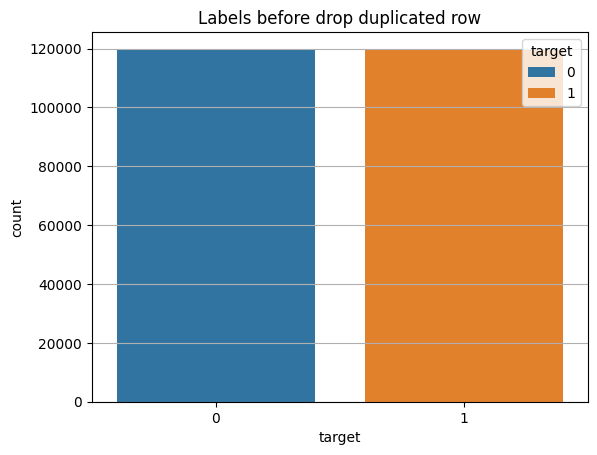

In [127]:
plt.grid()
sns.countplot(x=df['target'], hue=df['target'])
plt.title('Labels before drop duplicated row')
plt.show()

In [128]:
df['text'] = df['text'].str.lower()

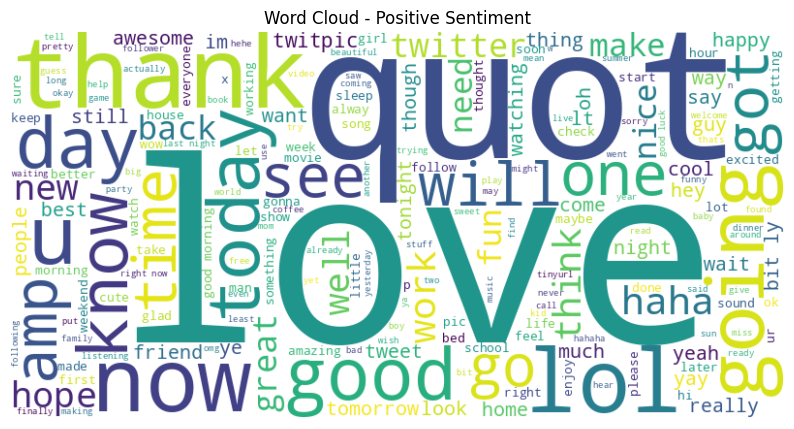

In [129]:
positive_tweets = df[df['target'] == 1]['text']

positive_text = ' '.join(positive_tweets)

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud - Positive Sentiment')
plt.show()

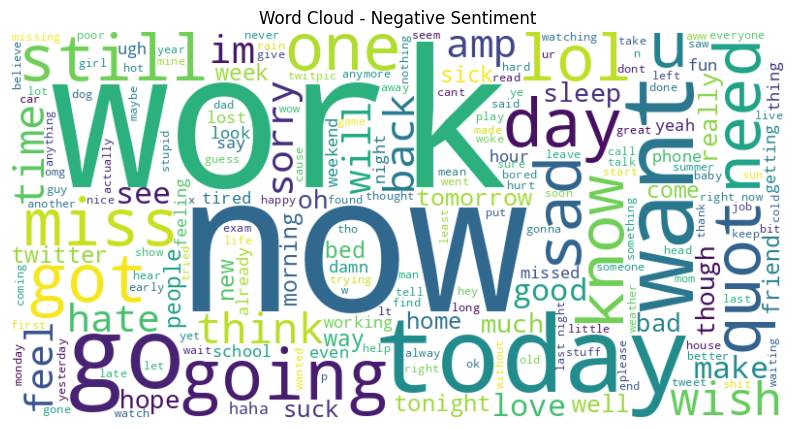

In [130]:
negative_tweets = df[df['target'] == 0]['text']

negative_text = ' '.join(negative_tweets)

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(negative_text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud - Negative Sentiment')
plt.show()

In [131]:
df['letter_count'] = df['text'].apply(len)

In [132]:
df.head(3)

,target,text,letter_count
0,1,i have something good in my life and just want...,130
1,1,back online,12
2,1,@nathanfillion what about apartment building m...,109


In [133]:
df.iloc[df['letter_count'].idxmax()]

,8854
target,0
text,isplayer has died! sorry
letter_count,25


In [134]:
stop_words = set(stopwords.words('english'))
def clean_text(text):
    text = text.lower()
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)
    text = re.sub(r'@\w+|#\w+', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    words = text.split()
    words = [word for word in words if word not in stop_words]
    return ' '.join(words)

In [135]:
df['text'] = df['text'].astype(str).apply(clean_text)

In [136]:
tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(df['text'])
y = df['target']

In [137]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [138]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Naive Bayes": MultinomialNB(),
    "SVM": LinearSVC()
}


=== Logistic Regression ===
Accuracy: 0.7653
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.74      0.76     23713
           1       0.76      0.79      0.77     24077

    accuracy                           0.77     47790
   macro avg       0.77      0.77      0.77     47790
weighted avg       0.77      0.77      0.77     47790



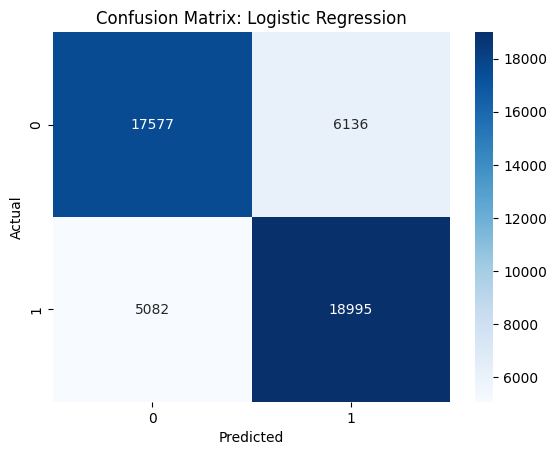


=== Naive Bayes ===
Accuracy: 0.7506
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.76      0.75     23713
           1       0.76      0.74      0.75     24077

    accuracy                           0.75     47790
   macro avg       0.75      0.75      0.75     47790
weighted avg       0.75      0.75      0.75     47790



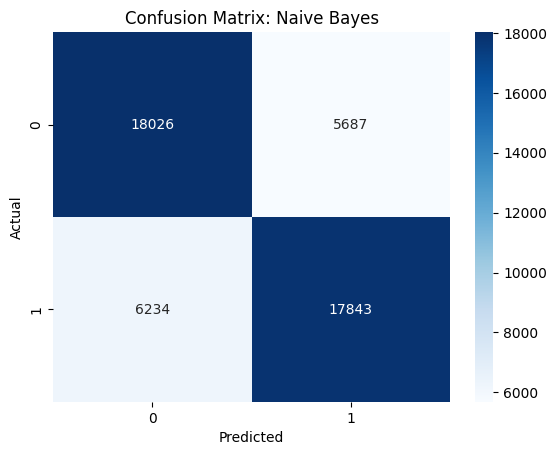


=== SVM ===
Accuracy: 0.7644
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.74      0.76     23713
           1       0.75      0.79      0.77     24077

    accuracy                           0.76     47790
   macro avg       0.76      0.76      0.76     47790
weighted avg       0.76      0.76      0.76     47790



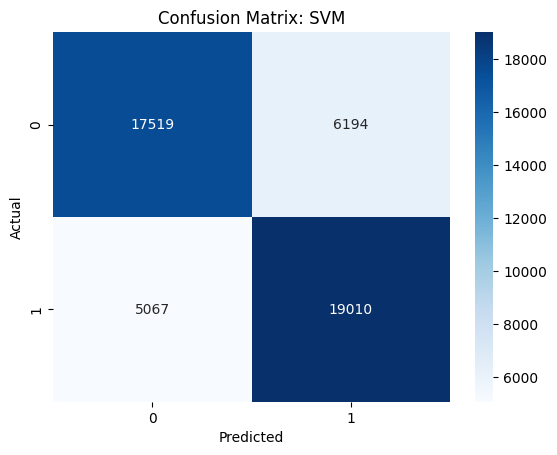

In [139]:
for name, model in models.items():
    print(f"\n=== {name} ===")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print("Classification Report:\n", classification_report(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix: {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

Best Parameters for Logistic Regression: {'C': 1, 'penalty': 'l2', 'solver': 'saga'}

=== Tuned Logistic Regression ===
Accuracy: 0.7657
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.74      0.76     23713
           1       0.76      0.79      0.77     24077

    accuracy                           0.77     47790
   macro avg       0.77      0.77      0.77     47790
weighted avg       0.77      0.77      0.77     47790



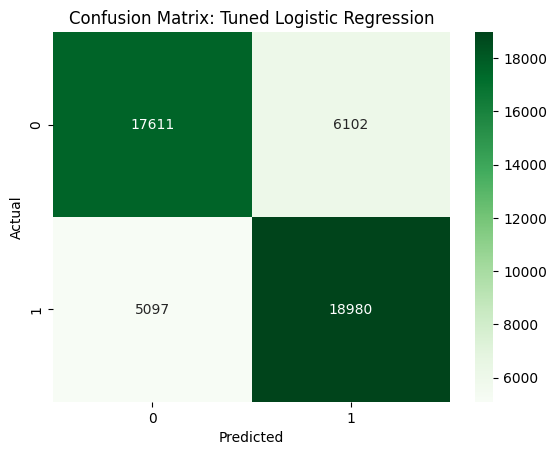

In [140]:
param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l2'],
    'solver': ['liblinear', 'saga']
}

log_reg = LogisticRegression(max_iter=1000)

grid = GridSearchCV(log_reg, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid.fit(X_train, y_train)

print("Best Parameters for Logistic Regression:", grid.best_params_)
best_log_reg = grid.best_estimator_

y_pred = best_log_reg.predict(X_test)
print(f"\n=== Tuned Logistic Regression ===")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix: Tuned Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()